<a href="https://colab.research.google.com/github/dourivaljunior/estudos-sobre-python-machine-learning-deep-learning/blob/main/metricas_de_avaliacao_modelo_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#Como avaliar seu modelo de classificação
# alguns scripts para serem usados em machine learning

In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving teste.csv to teste (4).csv


In [ ]:
df = pd.read_csv('teste.csv')

In [91]:
from sklearn.model_selection import train_test_split
cols=['Credit_History','LoanAmount','Property_Area','ApplicantIncome']
X = df[cols]
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print('O dataset de treino possui {} dados e o de treino {} dados.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 633 dados e o de treino 211 dados.


In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#avaliar o melhor valor de max_depth
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))


A acurácia foi de 73.46%.


In [93]:
#usar dados novos para fazer previsões novas para o modelo.
#para fazer essa aprte aqui você deve pegar uma parte dos dados e guardar, por exemplo, 10% dos dados originais para essa parte.
X_news = df[cols]
y_news = df['Loan_Status']
predict = model.predict(X_news)
accuracy = accuracy_score(y_news, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 77.73%.


In [95]:
#usando o método da validação cruzada
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(max_depth=5)  #alterar o parâmetro max_depth
results = cross_val_score(model, X_train, 
                          y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Acurácia média: 72.99%
Intervalo de acurácia: [67.60% ~ 78.38%]


In [101]:
#fazendo uma validação estratificada
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits = 4, shuffle = True)
model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 69.98%
Intervalo de acurácia: [63.88% ~ 76.07%]


In [103]:
#fazendo o estudo da exatidão de vários modelos ao mesmo tempo
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cv = StratifiedKFold(n_splits = 2, shuffle = True)
model = DecisionTreeClassifier(max_depth=3)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
models = [model, model_svc, model_log, model_rand]
name = ['Árvore de Decisão', 'SVC', 
        'Regressão Logística', 'Random Forest']
count = 0
for item in models:
    results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count],(mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão: 68.56%
Intervalo de acurácia - Modelo Árvore de Decisão: [66.88% ~ 70.24%]

Acurácia média - Modelo SVC: 72.19%
Intervalo de acurácia - Modelo SVC: [68.95% ~ 75.44%]

Acurácia média - Modelo Regressão Logística: 69.51%
Intervalo de acurácia - Modelo Regressão Logística: [69.29% ~ 69.73%]

Acurácia média - Modelo Random Forest: 79.94%
Intervalo de acurácia - Modelo Random Forest: [78.92% ~ 80.95%]



In [110]:
#precision
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))
cv = StratifiedKFold(n_splits = 3, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X_train, y_train, cv = cv,scoring = 'precision')
intervalo_prec(results)

Precisão média: 62.45%
Intervalo de Precisão: [61.71% ~ 63.19%]


In [118]:
#recall
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))
cv = StratifiedKFold(n_splits = 3, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 96.81%
Intervalo de Recall: [94.45% ~ 99.17%]


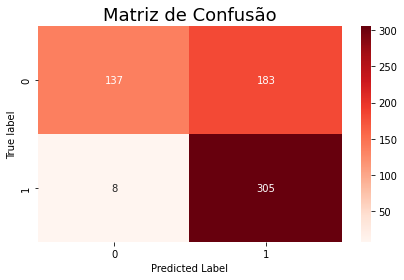

In [119]:
#fazendo a matriz de confusão
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = LogisticRegression(solver='liblinear')
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True,ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [120]:
#relatório do modelo
from sklearn.metrics import classification_report
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.9448    0.4281    0.5892       320
         1.0     0.6250    0.9744    0.7615       313

    accuracy                         0.6983       633
   macro avg     0.7849    0.7013    0.6754       633
weighted avg     0.7867    0.6983    0.6744       633



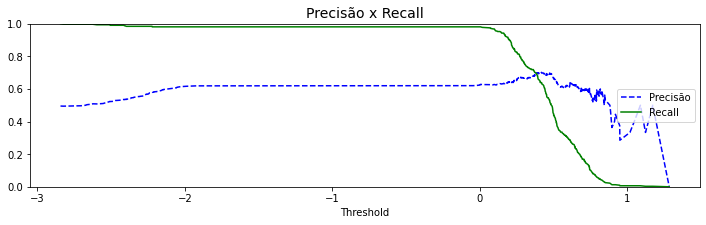

In [121]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = LogisticRegression(solver='liblinear')
y_scores = cross_val_predict(model, X_train, y_train, cv = cv,
                             method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train,  
                                                         y_scores)
fig, ax = plt.subplots(figsize = (12,3))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)
plt.show()

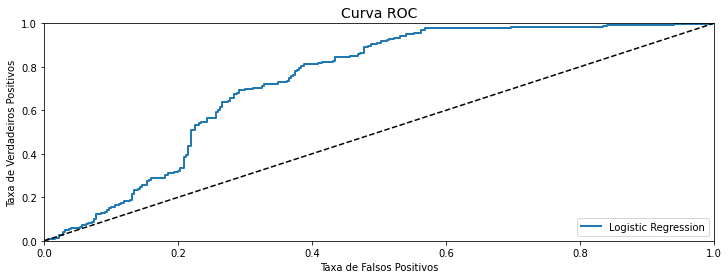

In [122]:
#curva das características operacionais do receptor (Receiver operating characteristic — ROC) 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()

In [123]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'
      .format(roc_auc_score(y_train, y_scores)))

Área sob a curva ROC: 0.7362


In [124]:
#fazendo o teste
final_model = LogisticRegression(solver='liblinear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_test, y_pred, digits=4))
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9655    0.5490    0.7000       102
         1.0     0.6993    0.9817    0.8168       109

    accuracy                         0.7725       211
   macro avg     0.8324    0.7653    0.7584       211
weighted avg     0.8280    0.7725    0.7603       211

AUC: 0.7612



In [125]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth=3) 
model3 = RandomForestClassifier(n_estimators=100)
results = cross_val_score(model3, X_train, y_train, cv = cv)
print(results)

[0.82677165 0.84251969 0.85826772 0.80952381 0.80952381]


In [ ]:
#FIM